In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None


In [2]:
bna_22 = pd.read_csv('../data/bna_2022.csv')

In [3]:
bna_w = pd.read_csv('../data/bna_weather.csv')

In [4]:
hw_data = pd.read_csv('../data/Headway Data.csv')

In [5]:
bna_22

,key,class,expire_time_gmt,obs_id,obs_name,valid_time_gmt,day_ind,temp,wx_icon,icon_extd,wx_phrase,pressure_tend,pressure_desc,dewPt,heat_index,rh,pressure,vis,wc,wdir,wdir_cardinal,gust,wspd,max_temp,min_temp,precip_total,precip_hrly,snow_hrly,uv_desc,feels_like,uv_index,qualifier,qualifier_svrty,blunt_phrase,terse_phrase,clds,water_temp,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction
0,KBNA,observation,1641027180,KBNA,Nashville,1641019980,N,71,26,2600,Cloudy,NaN,NaN,63,71,75,29.10,10.0,71.0,200.0,SSW,21.0,13.0,NaN,NaN,NaN,0.0,NaN,Low,71.0,0.0,NaN,NaN,NaN,NaN,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KBNA,observation,1641030780,KBNA,Nashville,1641023580,N,72,26,2600,Cloudy,NaN,NaN,63,72,73,29.10,10.0,72.0,210.0,SSW,21.0,12.0,NaN,NaN,NaN,0.0,NaN,Low,72.0,0.0,NaN,NaN,NaN,NaN,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KBNA,observation,1641034380,KBNA,Nashville,1641027180,N,73,26,2600,Cloudy,0.0,Steady,63,73,71,29.11,10.0,73.0,210.0,SSW,26.0,12.0,NaN,NaN,NaN,0.0,NaN,Low,73.0,0.0,NaN,NaN,NaN,NaN,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KBNA,observation,1641037980,KBNA,Nashville,1641030780,N,73,26,2600,Cloudy,NaN,NaN,62,73,68,29.10,10.0,73.0,200.0,SSW,30.0,18.0,NaN,NaN,NaN,0.0,NaN,Low,73.0,0.0,NaN,NaN,NaN,NaN,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KBNA,observation,1641041580,KBNA,Nashville,1641034380,N,73,26,2600,Cloudy,NaN,NaN,61,73,66,29.11,10.0,73.0,220.0,SW,23.0,10.0,NaN,NaN,NaN,0.0,NaN,Low,73.0,0.0,NaN,NaN,NaN,NaN,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7775,KBNA,observation,1646106780,KBNA,Nashville,1646099580,N,47,27,2700,Mostly Cloudy,NaN,NaN,26,47,44,29.52,10.0,44.0,180.0,S,NaN,6.0,NaN,NaN,NaN,0.0,NaN,Low,44.0,0.0,NaN,NaN,NaN,NaN,BKN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7776,KBNA,observation,1646110380,KBNA,Nashville,1646103180,N,46,29,2900,Partly Cloudy,2.0,Falling,26,46,46,29.52,10.0,46.0,180.0,S,NaN,3.0,NaN,NaN,NaN,0.0,NaN,Low,46.0,0.0,NaN,NaN,NaN,NaN,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7777,KBNA,observation,1646113980,KBNA,Nashville,1646106780,N,44,33,3300,Fair,NaN,NaN,26,44,49,29.53,10.0,44.0,NaN,CALM,NaN,0.0,NaN,NaN,NaN,0.0,NaN,Low,44.0,0.0,NaN,NaN,NaN,NaN,FEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7778,KBNA,observation,1646117580,KBNA,Nashville,1646110380,N,40,27,2700,Mostly Cloudy,NaN,NaN,28,40,63,29.53,10.0,36.0,180.0,S,NaN,6.0,NaN,NaN,NaN,0.0,NaN,Low,36.0,0.0,NaN,NaN,NaN,NaN,BKN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
bna_w

,Date,key,class,expire_time_gmt,obs_id,obs_name,valid_time_gmt,day_ind,temp,wx_icon,icon_extd,wx_phrase,pressure_tend,pressure_desc,dewPt,heat_index,rh,pressure,vis,wc,wdir,wdir_cardinal,gust,wspd,max_temp,min_temp,precip_total,precip_hrly,snow_hrly,uv_desc,feels_like,uv_index,qualifier,qualifier_svrty,blunt_phrase,terse_phrase,clds,water_temp,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction
0,2021-11-01 00:53:00,KBNA,observation,1635753180,KBNA,Nashville,1635745980,N,51,26,2600,Cloudy,1.0,Rising,43,51,74,29.59,10.0,51.0,360.0,N,NaN,9.0,68.0,51.0,NaN,0.00,NaN,Low,51.0,0.0,NaN,NaN,NaN,NaN,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-11-01 01:30:00,KBNA,observation,1635755400,KBNA,Nashville,1635748200,N,50,29,2900,Partly Cloudy,NaN,NaN,42,50,74,29.59,10.0,50.0,350.0,N,NaN,8.0,NaN,NaN,NaN,0.00,NaN,Low,50.0,0.0,NaN,NaN,NaN,NaN,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-11-01 01:53:00,KBNA,observation,1635756780,KBNA,Nashville,1635749580,N,49,33,3300,Fair,NaN,NaN,42,49,77,29.59,10.0,47.0,350.0,N,NaN,6.0,NaN,NaN,NaN,0.00,NaN,Low,47.0,0.0,NaN,NaN,NaN,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-11-01 02:53:00,KBNA,observation,1635760380,KBNA,Nashville,1635753180,N,48,33,3300,Fair,NaN,NaN,41,48,77,29.60,10.0,48.0,360.0,N,NaN,3.0,NaN,NaN,NaN,0.00,NaN,Low,48.0,0.0,NaN,NaN,NaN,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-11-01 03:53:00,KBNA,observation,1635763980,KBNA,Nashville,1635756780,N,47,33,3300,Fair,1.0,Rising Rapidly,41,47,80,29.61,10.0,47.0,NaN,CALM,NaN,0.0,NaN,NaN,NaN,0.00,NaN,Low,47.0,0.0,NaN,NaN,NaN,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9734,2022-10-31 19:53:00,KBNA,observation,1667271180,KBNA,Nashville,1667263980,N,60,26,2600,Cloudy,NaN,NaN,55,60,83,29.38,10.0,60.0,200.0,SSW,NaN,3.0,NaN,NaN,NaN,0.03,NaN,Low,60.0,0.0,NaN,NaN,NaN,NaN,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9735,2022-10-31 20:53:00,KBNA,observation,1667274780,KBNA,Nashville,1667267580,N,60,26,2600,Cloudy,NaN,NaN,55,60,83,29.39,9.0,60.0,NaN,CALM,NaN,0.0,NaN,NaN,NaN,0.00,NaN,Low,60.0,0.0,NaN,NaN,NaN,NaN,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9736,2022-10-31 21:53:00,KBNA,observation,1667278380,KBNA,Nashville,1667271180,N,58,27,2700,Mostly Cloudy,1.0,Rising Rapidly,54,58,87,29.41,7.0,58.0,200.0,SSW,NaN,3.0,NaN,NaN,NaN,0.00,NaN,Low,58.0,0.0,NaN,NaN,NaN,NaN,BKN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9737,2022-10-31 22:53:00,KBNA,observation,1667281980,KBNA,Nashville,1667274780,N,60,27,2700,Mostly Cloudy,NaN,NaN,54,60,80,29.42,10.0,60.0,210.0,SSW,NaN,5.0,NaN,NaN,NaN,0.00,NaN,Low,60.0,0.0,NaN,NaN,NaN,NaN,BKN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
hw_data

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,MCC5_9,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,0,1,0,0,NaN,0,23,22.416666
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MLKS,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,0,0,1,0,0.0,0,24,5.766666
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MCC5_11,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,0,0,1,0,NaN,0,25,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,MCC4_20,3.0,2,36.167091,-86.781923,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN,0,0,1,0,NaN,0,3,1.016666
1981711,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,MLKS,10.0,1,36.161008,-86.800851,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667,1,0,0,0,0.0,0,2,9.900000
1981712,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,MCC5_11,4.0,2,36.167091,-86.781923,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN,1,0,0,0,NaN,0,3,0.000000
1981713,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,MEIG,7.0,1,36.176017,-86.760399,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN,0,0,1,0,0.0,0,2,19.366666


In [8]:
display(hw_data)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,MCC5_9,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,0,1,0,0,NaN,0,23,22.416666
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MLKS,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,0,0,1,0,0.0,0,24,5.766666
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MCC5_11,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,0,0,1,0,NaN,0,25,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,MCC4_20,3.0,2,36.167091,-86.781923,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN,0,0,1,0,NaN,0,3,1.016666
1981711,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,MLKS,10.0,1,36.161008,-86.800851,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667,1,0,0,0,0.0,0,2,9.900000
1981712,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,MCC5_11,4.0,2,36.167091,-86.781923,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN,1,0,0,0,NaN,0,3,0.000000
1981713,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,MEIG,7.0,1,36.176017,-86.760399,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN,0,0,1,0,0.0,0,2,19.366666


In [9]:
print(hw_data.dtypes)

CALENDAR_ID                    int64
SERVICE_ABBR                   int64
ADHERENCE_ID                   int64
DATE                          object
ROUTE_ABBR                     int64
BLOCK_ABBR                     int64
OPERATOR                       int64
TRIP_ID                        int64
OVERLOAD_ID                    int64
ROUTE_DIRECTION_NAME          object
TIME_POINT_ABBR               object
ROUTE_STOP_SEQUENCE          float64
TRIP_EDGE                      int64
LATITUDE                     float64
LONGITUDE                    float64
SCHEDULED_TIME                object
ACTUAL_ARRIVAL_TIME           object
ACTUAL_DEPARTURE_TIME         object
ADHERENCE                    float64
SCHEDULED_HDWY               float64
ACTUAL_HDWY                  float64
HDWY_DEV                     float64
ADJUSTED_EARLY_COUNT           int64
ADJUSTED_LATE_COUNT            int64
ADJUSTED_ONTIME_COUNT          int64
STOP_CANCELLED                 int64
PREV_SCHED_STOP_CANCELLED    float64
I

In [10]:
hw_data2 = hw_data[['ROUTE_STOP_SEQUENCE','TRIP_EDGE']]
display(hw_data2)

,ROUTE_STOP_SEQUENCE,TRIP_EDGE
0,4.0,1
1,3.0,0
2,2.0,2
3,7.0,1
4,5.0,2
...,...,...
1981710,3.0,2
1981711,10.0,1
1981712,4.0,2
1981713,7.0,1


In [11]:
oper = hw_data.groupby(['OPERATOR']).count()
oper

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
OPERATOR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,125,125,125,93,75,75,148,148,148,148,95,148,148,125
30,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
85,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
86,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,28,28,28,45,22,22,55,55,55,55,45,55,55,28
93,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,6,6,6,6,5,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,545,545,545,545,545,545,545,545,545,545,545,545,545,545,545,501,501,501,403,376,376,545,545,545,545,443,545,545,501
2623,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,134,134,134,200,200,200,200,136,200,200,200
2624,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,34,34,34,41,41,41,41,34,41,41,41


In [12]:
posdev = hw_data.loc[hw_data['HDWY_DEV'] > 0]
posdev

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
13,120211101,1,76447977,2021-11-01,22,2200,1352,298128,0,TO DOWNTOWN,ELIZ,11.0,0,36.193454,-86.839981,05:46:00,05:48:15,05:48:15,-2.250000,35.0,35.866666,0.866666,0,0,1,0,0.0,0,71,0.000000
16,120211101,1,76447980,2021-11-01,22,2200,1352,298151,0,FROM DOWNTOWN,MCC5_12,4.0,1,36.167091,-86.781923,06:15:00,06:05:39,06:17:01,-2.016666,35.0,36.116666,1.116666,0,0,1,0,0.0,0,98,11.366666
17,120211101,1,76447981,2021-11-01,22,2200,1352,298151,0,FROM DOWNTOWN,CV23,6.0,0,36.183480,-86.814220,06:25:00,06:26:17,06:26:17,-1.283333,15.0,15.400000,0.400000,0,0,1,0,0.0,0,114,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981686,120221101,1,91056020,2022-11-01,7,705,1066,329447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,24:15:00,24:00:59,24:18:01,-3.016666,60.0,62.000000,2.000000,0,0,1,0,0.0,0,345,17.033333
1981687,120221101,1,91056021,2022-11-01,7,705,1066,329447,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,24:28:00,24:30:17,24:30:17,-2.283333,60.0,62.233333,2.233333,0,0,1,0,0.0,0,357,0.000000
1981689,120221101,1,91056025,2022-11-01,7,706,2597,329460,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,15:34:00,15:26:01,15:26:01,7.983333,15.0,16.916666,1.916666,1,0,0,0,0.0,0,2,0.000000
1981690,120221101,1,91056026,2022-11-01,7,706,2597,329460,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,15:44:00,15:56:35,15:58:19,-14.316666,15.0,16.650000,1.650000,0,1,0,0,0.0,0,11,1.733333


In [13]:
negdev = hw_data.loc[hw_data['HDWY_DEV'] < 0]
negdev

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
12,120211101,1,76447976,2021-11-01,22,2200,1352,298128,0,TO DOWNTOWN,MHSP,15.0,1,36.178360,-86.845441,05:42:00,05:33:39,05:43:03,-1.050000,35.0,34.633333,-0.366667,0,0,1,0,0.0,0,64,9.40
14,120211101,1,76447978,2021-11-01,22,2200,1352,298128,0,TO DOWNTOWN,CV23,6.0,0,36.182177,-86.814445,05:54:00,05:54:23,05:54:23,-0.383333,15.0,13.983333,-1.016667,0,0,1,0,0.0,0,81,0.00
24,120211101,1,76447988,2021-11-01,22,2200,1352,298152,0,FROM DOWNTOWN,CV23,6.0,0,36.183480,-86.814220,07:25:00,07:29:45,07:29:45,-4.750000,15.0,11.333333,-3.666667,0,0,1,0,0.0,0,176,0.00
27,120211101,1,76447991,2021-11-01,22,2200,1352,298130,0,TO DOWNTOWN,MHSP,15.0,1,36.178360,-86.845441,07:45:00,07:40:28,07:44:49,0.183333,63.0,61.533333,-1.466667,0,0,1,0,0.0,0,191,4.35
34,120211101,1,76447998,2021-11-01,22,2200,1352,298131,0,TO DOWNTOWN,CV23,6.0,0,36.182177,-86.814445,08:54:00,08:55:59,08:55:59,-1.983333,15.0,14.916666,-0.083334,0,0,1,0,0.0,0,268,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981695,120221101,1,91056031,2022-11-01,7,706,375,329461,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,17:07:00,17:08:19,17:08:19,-1.316666,18.0,16.850000,-1.150000,0,0,1,0,0.0,0,51,0.00
1981696,120221101,1,91056032,2022-11-01,7,706,375,329461,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,17:16:00,17:22:47,17:22:47,-6.783333,17.0,14.500000,-2.500000,0,1,0,0,0.0,0,60,0.00
1981698,120221101,1,91056034,2022-11-01,7,706,375,329459,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,17:45:00,17:46:10,17:46:10,-1.166666,15.0,13.116666,-1.883334,0,0,1,0,0.0,0,73,0.00
1981699,120221101,1,91056035,2022-11-01,7,706,375,329459,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,18:01:00,18:05:13,18:05:13,-4.216666,14.0,7.483333,-6.516667,0,0,1,0,0.0,0,85,0.00


In [14]:
hw_data.groupby(['OPERATOR'])['ADHERENCE'].mean()

OPERATOR
0        -3.150400
30       18.450000
85        8.833333
86       -1.570833
93       -4.694444
           ...    
2622     -1.592448
2623     -0.337417
2624     -3.826829
2630     -2.319298
22554    -0.388889
Name: ADHERENCE, Length: 458, dtype: float64

In [15]:
fdownt = hw_data.loc[(hw_data['ROUTE_DIRECTION_NAME'] == 'FROM DOWNTOWN')]
fdownt

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
9,120211101,1,76447973,2021-11-01,22,2200,1352,298162,0,FROM DOWNTOWN,MCC5_12,4.0,1,36.167091,-86.781923,05:15:00,05:05:26,05:16:49,-1.816666,NaN,NaN,NaN,0,0,1,0,0.0,0,36,11.383333
10,120211101,1,76447974,2021-11-01,22,2200,1352,298162,0,FROM DOWNTOWN,CV23,6.0,0,36.183480,-86.814220,05:25:00,05:25:52,05:25:52,-0.866666,NaN,NaN,NaN,0,0,1,0,0.0,0,52,0.000000
11,120211101,1,76447975,2021-11-01,22,2200,1352,298162,0,FROM DOWNTOWN,MHSP,15.0,2,36.178360,-86.845441,05:32:00,05:33:39,05:33:39,-1.650000,NaN,NaN,NaN,0,0,1,0,NaN,0,63,0.000000
16,120211101,1,76447980,2021-11-01,22,2200,1352,298151,0,FROM DOWNTOWN,MCC5_12,4.0,1,36.167091,-86.781923,06:15:00,06:05:39,06:17:01,-2.016666,35.0,36.116666,1.116666,0,0,1,0,0.0,0,98,11.366666
17,120211101,1,76447981,2021-11-01,22,2200,1352,298151,0,FROM DOWNTOWN,CV23,6.0,0,36.183480,-86.814220,06:25:00,06:26:17,06:26:17,-1.283333,15.0,15.400000,0.400000,0,0,1,0,0.0,0,114,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981700,120221101,1,91056036,2022-11-01,7,706,375,329459,0,FROM DOWNTOWN,HBHS,5.0,2,36.107575,-86.812719,18:20:00,18:19:08,18:19:08,0.866666,NaN,NaN,NaN,0,0,1,0,NaN,0,99,0.000000
1981701,120221101,1,91057244,2022-11-01,50,8401,2151,329871,0,FROM DOWNTOWN,MCC5_2,9.0,1,36.167091,-86.781923,07:20:00,07:01:38,07:01:38,18.366666,NaN,NaN,NaN,1,0,0,0,0.0,0,20,0.000000
1981702,120221101,1,91057245,2022-11-01,50,8401,2151,329871,0,FROM DOWNTOWN,HEAD,11.0,2,36.158659,-86.804683,07:35:00,07:27:25,07:27:25,7.583333,NaN,NaN,NaN,1,0,0,0,NaN,0,21,0.000000
1981705,120221101,1,91057372,2022-11-01,50,8601,2600,329896,0,FROM DOWNTOWN,MCC4_22,7.0,1,36.167091,-86.781923,07:22:00,07:16:44,07:25:54,-3.900000,NaN,NaN,NaN,0,0,1,0,0.0,0,23,9.166666


In [16]:
downdwell = fdownt[['ROUTE_DIRECTION_NAME','DWELL_IN_MINS']]
downdwell

,ROUTE_DIRECTION_NAME,DWELL_IN_MINS
9,FROM DOWNTOWN,11.383333
10,FROM DOWNTOWN,0.000000
11,FROM DOWNTOWN,0.000000
16,FROM DOWNTOWN,11.366666
17,FROM DOWNTOWN,0.000000
...,...,...
1981700,FROM DOWNTOWN,0.000000
1981701,FROM DOWNTOWN,0.000000
1981702,FROM DOWNTOWN,0.000000
1981705,FROM DOWNTOWN,9.166666


In [17]:
todownt = hw_data.loc[(hw_data['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN')]
todownt

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,MCC5_9,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,0,1,0,0,NaN,0,23,22.416666
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MLKS,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,0,0,1,0,0.0,0,24,5.766666
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MCC5_11,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,0,0,1,0,NaN,0,25,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,MCC4_20,3.0,2,36.167091,-86.781923,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN,0,0,1,0,NaN,0,3,1.016666
1981711,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,MLKS,10.0,1,36.161008,-86.800851,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667,1,0,0,0,0.0,0,2,9.900000
1981712,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,MCC5_11,4.0,2,36.167091,-86.781923,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN,1,0,0,0,NaN,0,3,0.000000
1981713,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,MEIG,7.0,1,36.176017,-86.760399,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN,0,0,1,0,0.0,0,2,19.366666


In [18]:
todwell = todownt[['ROUTE_DIRECTION_NAME','DWELL_IN_MINS']]
todwell

,ROUTE_DIRECTION_NAME,DWELL_IN_MINS
0,TO DOWNTOWN,12.650000
1,TO DOWNTOWN,0.000000
2,TO DOWNTOWN,22.416666
3,TO DOWNTOWN,5.766666
4,TO DOWNTOWN,0.000000
...,...,...
1981710,TO DOWNTOWN,1.016666
1981711,TO DOWNTOWN,9.900000
1981712,TO DOWNTOWN,0.000000
1981713,TO DOWNTOWN,19.366666


In [19]:
print(hw_data.dtypes)

CALENDAR_ID                    int64
SERVICE_ABBR                   int64
ADHERENCE_ID                   int64
DATE                          object
ROUTE_ABBR                     int64
BLOCK_ABBR                     int64
OPERATOR                       int64
TRIP_ID                        int64
OVERLOAD_ID                    int64
ROUTE_DIRECTION_NAME          object
TIME_POINT_ABBR               object
ROUTE_STOP_SEQUENCE          float64
TRIP_EDGE                      int64
LATITUDE                     float64
LONGITUDE                    float64
SCHEDULED_TIME                object
ACTUAL_ARRIVAL_TIME           object
ACTUAL_DEPARTURE_TIME         object
ADHERENCE                    float64
SCHEDULED_HDWY               float64
ACTUAL_HDWY                  float64
HDWY_DEV                     float64
ADJUSTED_EARLY_COUNT           int64
ADJUSTED_LATE_COUNT            int64
ADJUSTED_ONTIME_COUNT          int64
STOP_CANCELLED                 int64
PREV_SCHED_STOP_CANCELLED    float64
I

In [20]:
hw_data


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,MCC5_9,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,0,1,0,0,NaN,0,23,22.416666
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MLKS,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,0,0,1,0,0.0,0,24,5.766666
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MCC5_11,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,0,0,1,0,NaN,0,25,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,MCC4_20,3.0,2,36.167091,-86.781923,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN,0,0,1,0,NaN,0,3,1.016666
1981711,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,MLKS,10.0,1,36.161008,-86.800851,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667,1,0,0,0,0.0,0,2,9.900000
1981712,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,MCC5_11,4.0,2,36.167091,-86.781923,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN,1,0,0,0,NaN,0,3,0.000000
1981713,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,MEIG,7.0,1,36.176017,-86.760399,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN,0,0,1,0,0.0,0,2,19.366666


In [21]:
meanad = hw_data.groupby(['OPERATOR'])['ADHERENCE'].mean()
meanad

OPERATOR
0        -3.150400
30       18.450000
85        8.833333
86       -1.570833
93       -4.694444
           ...    
2622     -1.592448
2623     -0.337417
2624     -3.826829
2630     -2.319298
22554    -0.388889
Name: ADHERENCE, Length: 458, dtype: float64

In [22]:
meanad.head(10)

OPERATOR
0      -3.150400
30     18.450000
85      8.833333
86     -1.570833
93     -4.694444
195    -4.545000
212    -2.746528
230    -1.387218
235    -0.098718
242    -2.516666
Name: ADHERENCE, dtype: float64

In [23]:
op1 = hw_data[['OPERATOR','ADHERENCE','DWELL_IN_MINS']]
op1


,OPERATOR,ADHERENCE,DWELL_IN_MINS
0,2088,-2.000000,12.650000
1,2088,-3.350000,0.000000
2,2088,-20.183333,22.416666
3,2088,-0.283333,5.766666
4,2088,10.016666,0.000000
...,...,...,...
1981710,2355,-2.733333,1.016666
1981711,1880,12.900000,9.900000
1981712,1880,26.733333,0.000000
1981713,1922,0.966666,19.366666


In [24]:
avgop1 = op1.groupby('OPERATOR').agg({'ADHERENCE': ['mean'],'DWELL_IN_MINS':['mean']}).head(10)
avgs = pd.DataFrame(avgop1)
print(avgs)

          ADHERENCE DWELL_IN_MINS
               mean          mean
OPERATOR                         
0         -3.150400      2.051600
30        18.450000      0.000000
85         8.833333      0.000000
86        -1.570833      3.842262
93        -4.694444      2.250000
195       -4.545000      3.460833
212       -2.746528      2.720139
230       -1.387218      2.592105
235       -0.098718      5.204701
242       -2.516666      0.000000


In [25]:
avgs.columns = ['ad_avg', 'dwell_avg']
print(avgs)

             ad_avg  dwell_avg
OPERATOR                      
0         -3.150400   2.051600
30        18.450000   0.000000
85         8.833333   0.000000
86        -1.570833   3.842262
93        -4.694444   2.250000
195       -4.545000   3.460833
212       -2.746528   2.720139
230       -1.387218   2.592105
235       -0.098718   5.204701
242       -2.516666   0.000000


ValueError: Could not interpret input 'OPERATOR'

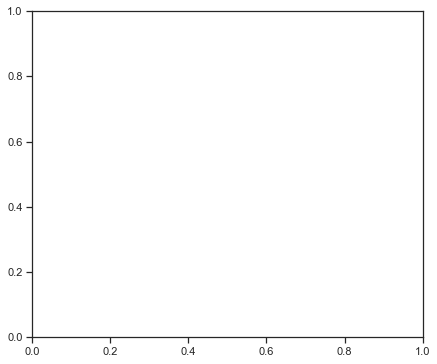

In [26]:
sns.set_theme(style='ticks')

f, ax = plt.subplots(figsize=(7, 6))

sns.set_theme(style='ticks')

sns.boxplot( x = 'ad_avg',  y='OPERATOR', data= avgs,
           whis=[0,100], width=.6, palette='vlag')
sns.stripplot(x ='ad_avg', y= 'OPERATOR', data= avgs,
             size=4, color= '.3', linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel='')
sns.despine(trim=True, left=True)

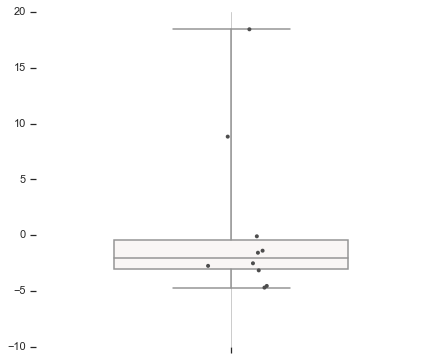

In [37]:
sns.set_theme(style='ticks')

f, ax = plt.subplots(figsize=(7, 6))

sns.boxplot( y='ad_avg', data=avgs,
           whis=[0,100], width=.6, palette='vlag')

sns.stripplot( y= 'ad_avg', data= avgs,
             size=4, color= '.3', linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel='')
sns.despine(trim=True, left=True)

<Figure size 2160x1080 with 0 Axes>

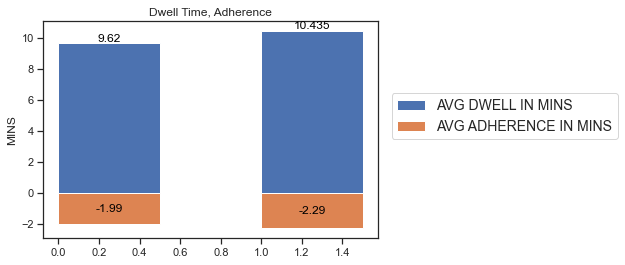

In [28]:
f = plt.figure(figsize=(30, 15))
labels = ['From', 'To']
AVG_DWELL_IN_MINS = [9.62, 10.435]
AVG_ADHERENCE = [-1.99, -2.29]
x = np.arange(len(labels))
width = 0.5
fig, ax = plt.subplots()

rects2 = ax.bar(x + width/2, AVG_DWELL_IN_MINS, width, label= 'AVG DWELL IN MINS')
rects3 = ax.bar(x + width/2, AVG_ADHERENCE, width, label= 'AVG ADHERENCE IN MINS')
colors=np.random.rand(3)
ax.set_ylabel('MINS')
ax.set_title('Dwell Time, Adherence')

ax.legend(
         fontsize = 14,
         bbox_to_anchor = (1.02, 0.7))

ax.bar_label(rects2, label_type='edge', color ='black', fontsize= 12)
ax.bar_label(rects3, label_type='center', color ='black', fontsize=12)
plt.show();



In [69]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd


rng = avgs
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.avgs(500, 6), 0)

AttributeError: 'DataFrame' object has no attribute 'avgs'

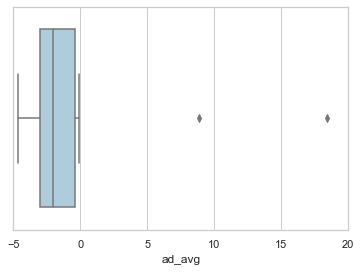

In [44]:
sns.boxplot(x='ad_avg',
           data=avgs)
sns.set_theme(style='whitegrid', palette= ('Paired'), font = 'sans-serif', font_scale=1, rc=None)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

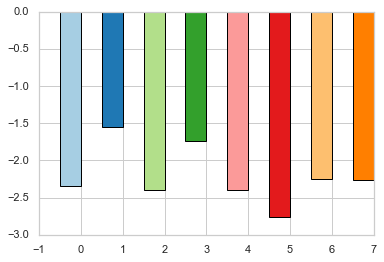

In [65]:
labels= [7, 22, 3, 23, 55, 50, 52,56]
AVE_DWELL_IN_MINS= [12.48,11.32,10.62,9.79,9.78,8.87,8.62]
AVG_ADHERENCE = [-2.34,-1.55,-2.40,-1.74,-2.40,-2.76,-2.25,-2.26]

x = np.arange(len(labels))
width=0.5
colors=sns.color_palette('Paired', 8)
fig, ax = plt. subplots() 
rects1 = ax.bar(x-width/2, AVG_ADHERENCE, width, label= 'AVG Adherence', color=colors,edgecolor='black')
rects2 = ax.bar(x-width/2, AVE_DWELL_IN_MINS, width, label= 'AVG DWELL IN MINS', color=colors,edgecolor='black')

ax.set_ylabel('Mins')
ax. set_title('Average Adherence', 'Dwell Time')
ax. set_xtacks (x, labels)
ax. legend()
                
ax.bar_label(rects1, label_type='edge', color='black', padding= -2, fontsize=13) 
ax.bar_label( rects2, label_type= 'center', color='white', fontsize= 14)

fig.tight_layout() 
plt.show()